In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

# 1) Filtrado simple con una ventana promedio

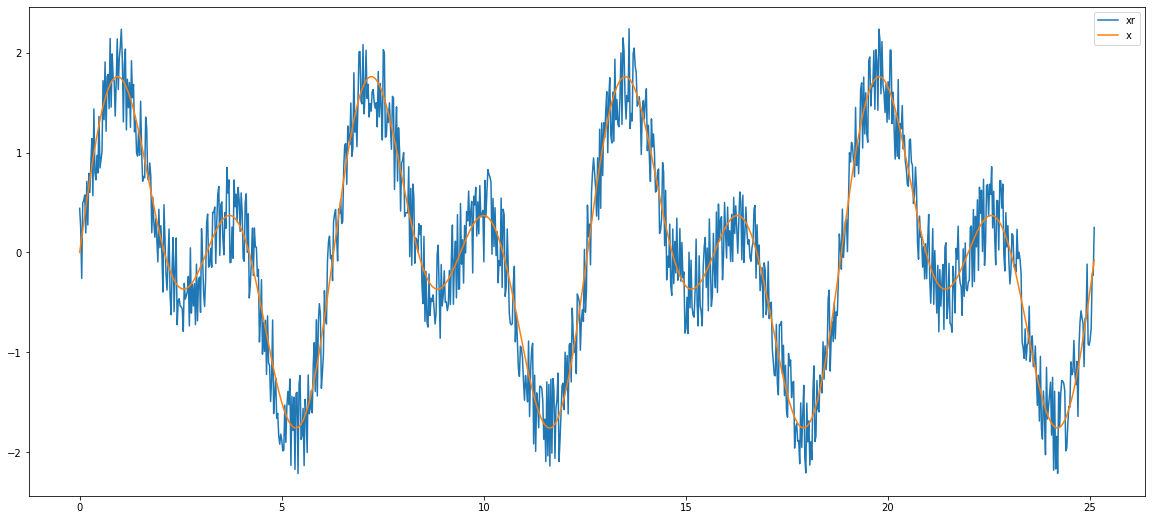

In [ ]:
n = 1000
i = np.array(range(n))
t = i*8*np.pi/n
x = np.sin(t)+np.sin(2*t)

r  = np.random.random_sample(size = n)-0.5

xr  = x + r
plt.figure(figsize=(20,9))
plt.plot(t,xr)
plt.plot(t,x)
plt.legend(['xr','x'])
plt.show()


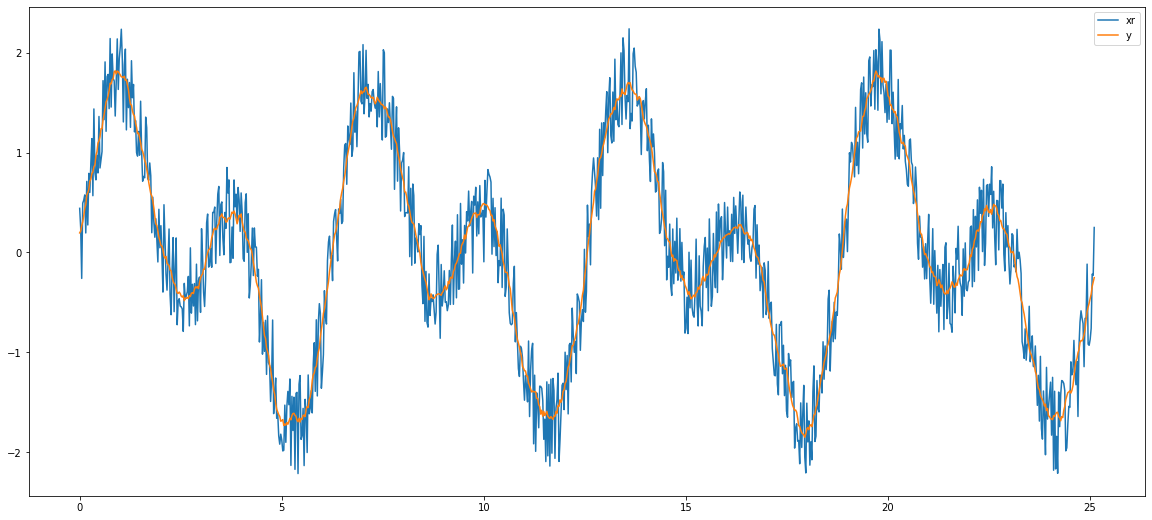

In [ ]:
m = 15
g = np.ones((m,))/m

y = np.convolve(xr,g,'same')

plt.figure(figsize=(20,9))
plt.plot(t,xr)
#plt.plot(t,x)
plt.plot(t,y)
plt.legend(['xr','y'])
plt.show()

# 2) Separación de dos señales (con Gaussianas)

* $x_1$: primera señal de frecuencia baja

* $x_2$: primera señal de frecuencia alta

* $x = x_1 + x_2$

* $z = x_1 + x_2 + $ ruido

Problema: a partir de $z$ encontrar $x_1$ y $x_2$

Solución:

$y_1 = $ filtro pasa (muy) bajo de $z$ con una Gaussiana $h_1$ de ancho 7: aquí solo pasa la sinusoide de frecuencia baja

$y_2 = $ filtro pasa bajo de $z$ con una Gaussiana $h_1$ de ancho 1: aquí se elimina el ruido, $y_2$ es parecido a $x$.

La reconstrucción de $x_1$ es $y_1$.

La reconstrucción de $x_2$ es $y_2 - y_1$.

: primera señal de frecuencia baja

![Screen Shot 2021-09-15 at 8.34.36 pm.png](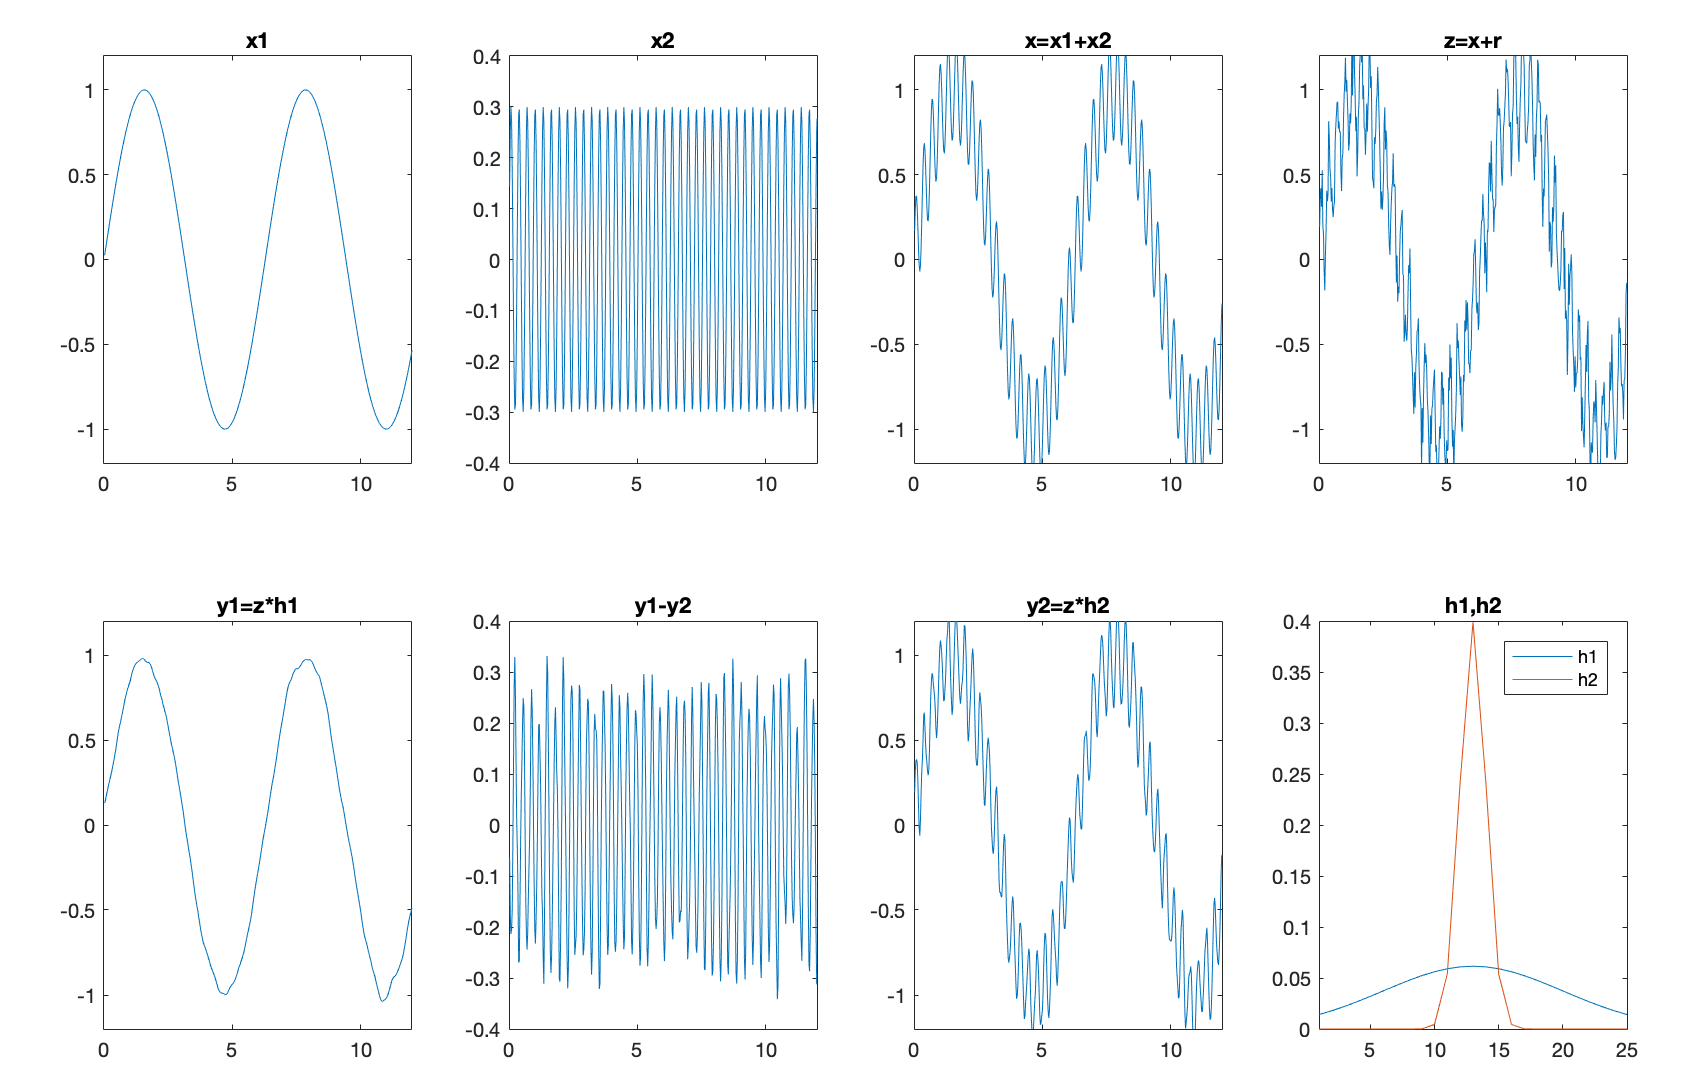
)

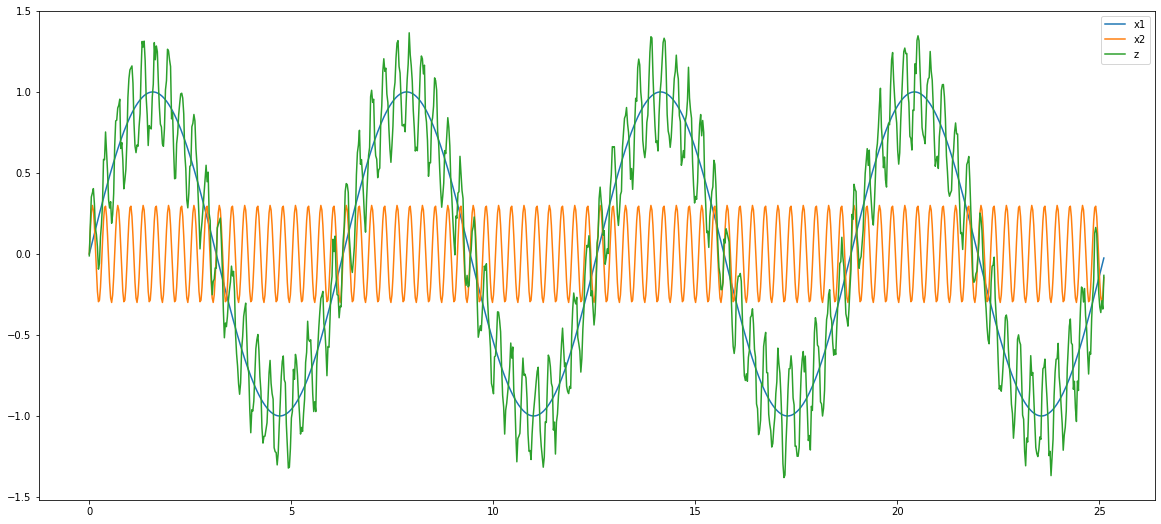

In [ ]:
n  = 1000
i  = np.array(range(n))
t  = i*8*np.pi/n
x1 = np.sin(t)
x2 = 0.3*np.sin(20*t)
x  = x1+x2
r  = 0.2*(np.random.random_sample(size = n)-0.5)
z  = x + r
plt.figure(figsize=(20,9))
plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,z)
plt.legend(['x1','x2','z'])
plt.show()


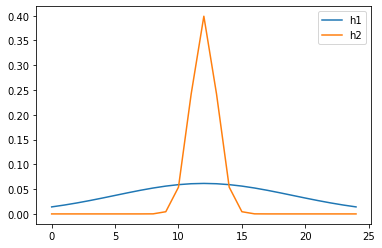

In [ ]:
m = 25
h1 = cv.getGaussianKernel(m, 7)
h2 = cv.getGaussianKernel(m, 1)
plt.plot(h1)
plt.plot(h2)
plt.legend(['h1','h2'])
plt.show()

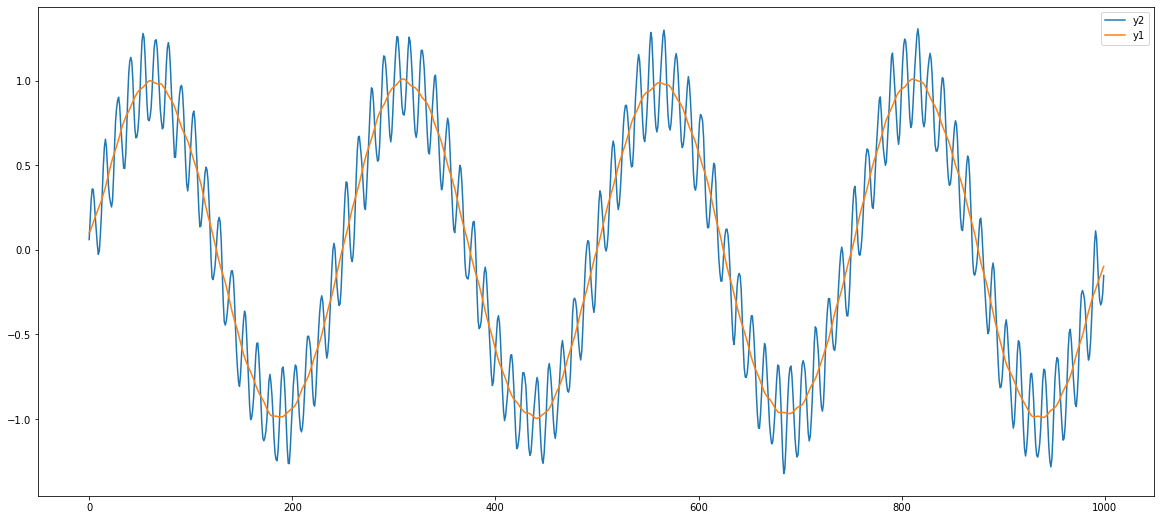

In [ ]:
y1 = np.convolve(z,h1[:,0],'same')
y2 = np.convolve(z,h2[:,0],'same')
plt.figure(figsize=(20,9))
plt.plot(y2)
plt.plot(y1)
plt.legend(['y2','y1'])
plt.show()

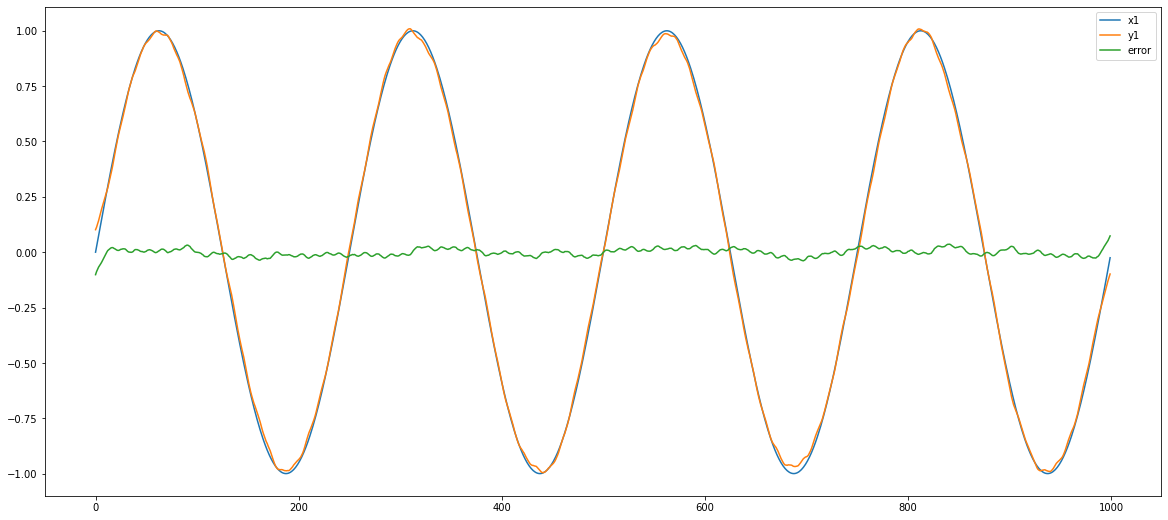

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(x1)
plt.plot(y1)
plt.plot(x1-y1)
plt.legend(['x1','y1','error'])
plt.show()

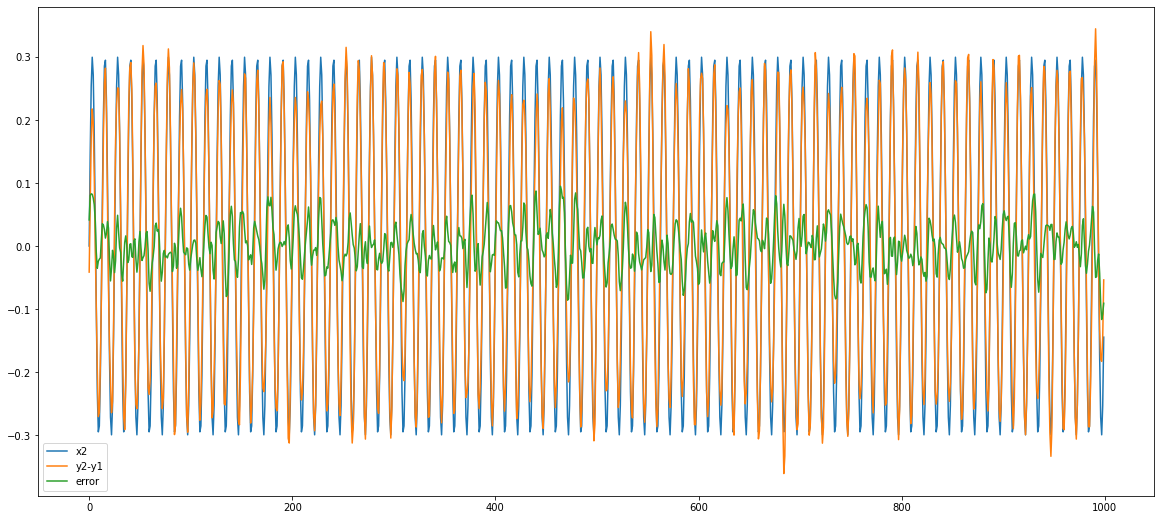

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(x2)
plt.plot(-y1+y2)
plt.plot(x2-(-y1+y2))
plt.legend(['x2','y2-y1','error'])
plt.show()

# 3) Simulación de una imagen con movimeinto horizontal

--2021-09-16 15:09:29--  https://www.dropbox.com/s/1h8r5202usgy3pc/zebra_bw.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1h8r5202usgy3pc/zebra_bw.png [following]
--2021-09-16 15:09:29--  https://www.dropbox.com/s/raw/1h8r5202usgy3pc/zebra_bw.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc54c8afce3bc88fec9367d953d1.dl.dropboxusercontent.com/cd/0/inline/BWQbAwxC2V2MVqnNtd2MW2YUEU3Uhp_AJRS09xmtX78tVJkOjFze9zvKHcmR8fwA5vv3jppy8DKrERSIKTciOHziagx1F5J4J16INQvoDKJi2Af8HCYpr1uvWhEWeFPHZGhz7Il5xz3PaBwhswFuKh2O/file# [following]
--2021-09-16 15:09:30--  https://uc54c8afce3bc88fec9367d953d1.dl.dropboxusercontent.com/cd/0/inline/BWQbAwxC2V2MVqnNtd2MW2YUEU3Uhp_AJRS09xmtX78tVJkOjFze9zvKHcmR8fwA5vv3jppy8DKrERSIKTciOHzia

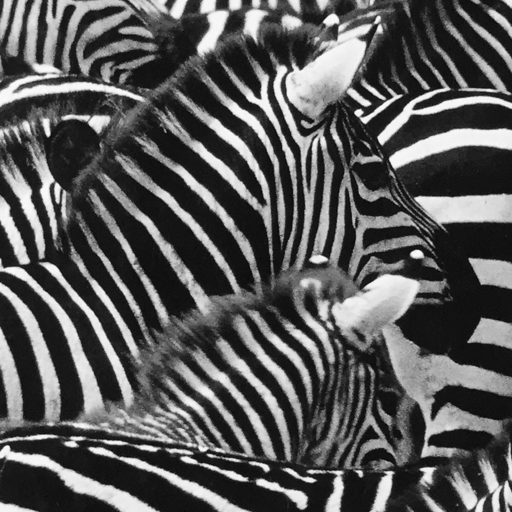

In [ ]:
!wget https://www.dropbox.com/s/1h8r5202usgy3pc/zebra_bw.png
X = cv.imread('zebra_bw.png',0)
cv2_imshow(X)


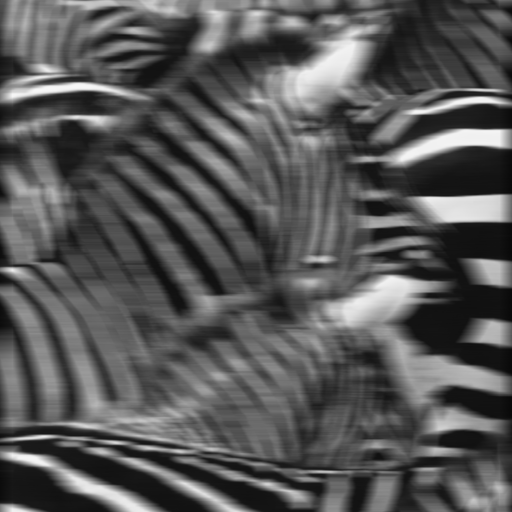

In [ ]:
# Convolución línea por línea
m = 25
g = np.ones((m,))/m
(N,M) = X.shape
Y = np.zeros((N,M))
for i in range(N):
  Y[i,:] = np.convolve(X[i,:],g,'same')
cv2_imshow(Y)

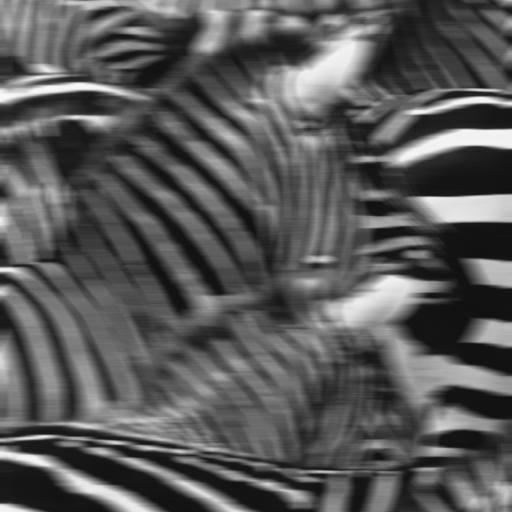

In [ ]:
# Convolución de toda la imagen 
h = g.reshape(1,m)
Y = cv.filter2D(X,-1,h)
cv2_imshow(Y)

# 4) Detección de bordes

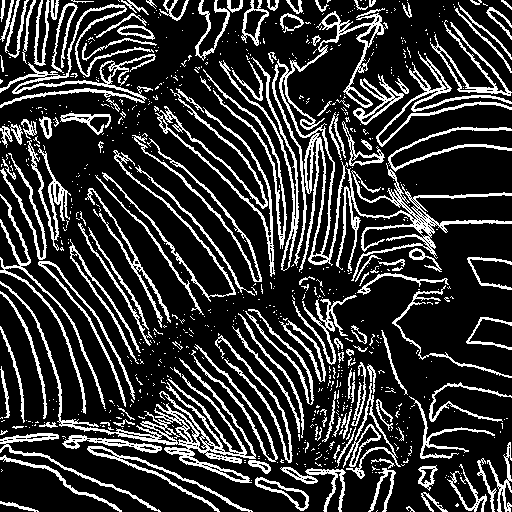

In [ ]:
Xd = X.astype(float)
th = 50
h1 = np.array([-1,0,1])
Y1 = np.abs(cv.filter2D(Xd,-1,h1))
Z1 = Y1>th
h2 = h1.reshape(1,3)
Y2 = np.abs(cv.filter2D(Xd,-1,h2))
Z2 = Y2>th
Z  = np.logical_or(Z1,Z2)
cv2_imshow(Z*255)

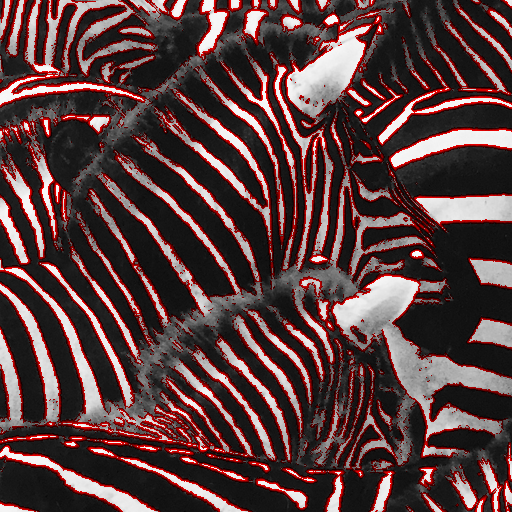

In [ ]:
(N,M) = X.shape
D = np.zeros((N,M,3))
D[:,:,1] = np.multiply(X,(1-Z))
D[:,:,0] = np.multiply(X,(1-Z))
D[:,:,2] = X
cv2_imshow(D)


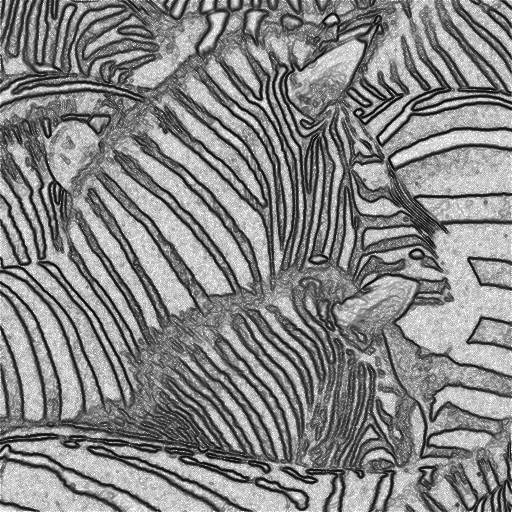

In [ ]:
T1 = np.sqrt(np.multiply(Y1,Y1)+np.multiply(Y2,Y2))
T1 = np.log(T1+1)
T1 = T1/np.max(T1)*255
cv2_imshow(255-T1)